In [20]:
## Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

In [2]:
## Reading csv and excel files into dataframes
tm837 = pd.read_csv('../data/race_data/TelemetryData_8377650301140219417.csv', low_memory =False)
tm145 = pd.read_csv('../data/race_data/TelemetryData_14577742557187250604.csv', low_memory=False)
sd145 = pd.read_csv('../data/race_data/SessionData_14577742557187250604.csv', low_memory=False)
sd837 = pd.read_csv('../data/race_data/SessionData_8377650301140219417.csv', low_memory=False)
sd102 = pd.read_csv('../data/race_data/SessionData_10230136787177318441.csv', low_memory=False)
sd108 = pd.read_csv('../data/race_data/SessionData_1087987310493855854.csv', low_memory=False)
sd117 = pd.read_csv('../data/race_data/SessionData_11752605864096667831.csv', low_memory=False)
pilot1_102 = pd.read_excel('../data/excel_files/driver_1_tm102.xlsx')
pilot1_108 = pd.read_excel('../data/excel_files/driver_1_tm108.xlsx')
pilot1_117 = pd.read_excel('../data/excel_files/driver_1_tm117.xlsx')

##### I pushed all .csv files from the dataset onto a postgres database for manipulation using src/csv_to_db.py
##### Datasets filtered by pilot were created using sql_queries/* and src/convert_sqls.py

In [3]:
tm145.columns

Index(['sessionTime', 'frameIdentifier', 'pilot_index', 'worldPositionX',
       'worldPositionY', 'worldPositionZ', 'worldVelocityX', 'worldVelocityY',
       'worldVelocityZ', 'worldForwardDirX', 'worldForwardDirY',
       'worldForwardDirZ', 'worldRightDirX', 'worldRightDirY',
       'worldRightDirZ', 'gForceLateral', 'gForceLongitudinal',
       'gForceVertical', 'yaw', 'pitch', 'roll', 'speed', 'throttle', 'steer',
       'brake', 'clutch', 'gear', 'engineRPM', 'drs', 'brakesTemperature',
       'tyresSurfaceTemperature', 'tyresInnerTemperature', 'engineTemperature',
       'tyresPressure', 'surfaceType', 'fuelMix', 'pitLimiterStatus',
       'fuelInTank', 'fuelRemainingLaps', 'tyresWear', 'actualTyreCompound',
       'tyresDamage', 'ersStoreEnergy', 'ersDeployMode',
       'ersHarvestedThisLapMGUK', 'ersHarvestedThisLapMGUH',
       'ersDeployedThisLap', 'carPosition', 'currentLapTime', 'currentLapNum',
       'lapDistance', 'totalDistance', 'pitStatus', 'sector', 'driverStatus',

In [4]:
##removing lap 36 from tm145 to eliminate outliers.

lapfilter = tm145['currentLapNum'] < 36
tm145 = tm145[lapfilter]
tm145 = tm145.replace([0], np.NaN)

In [5]:
## Grabbing columns that I want in .corr()

tm145_1 = tm145[['worldVelocityX', 'worldVelocityY',
       'worldVelocityZ', 'gForceLateral', 'gForceLongitudinal',
       'gForceVertical', 'yaw', 'pitch', 'roll', 'speed', 'throttle', 'steer',
       'brake', 'clutch', 'gear', 'engineRPM', 'brakesTemperature',
       'tyresSurfaceTemperature', 'tyresInnerTemperature', 'engineTemperature',
       'tyresPressure', 'surfaceType', 'fuelInTank', 'fuelRemainingLaps', 'tyresWear',
       'carPosition', 'currentLapNum', 'totalDistance']]#corr(numeric_only=True)

tm145_1.corr(numeric_only=True)

,worldVelocityX,worldVelocityY,worldVelocityZ,gForceLateral,gForceLongitudinal,gForceVertical,yaw,pitch,roll,speed,...,brake,clutch,gear,engineRPM,engineTemperature,fuelInTank,fuelRemainingLaps,carPosition,currentLapNum,totalDistance
worldVelocityX,1.000000,-0.172549,0.382105,0.208387,-0.061725,0.040246,0.654545,-0.251133,0.084747,0.167420,...,-0.090425,NaN,0.181283,-0.056487,-0.003376,-0.009928,-0.012188,0.002987,-0.006035,0.009434
worldVelocityY,-0.172549,1.000000,-0.376171,0.085988,-0.000021,-0.019709,0.121767,0.002046,-0.034734,-0.261364,...,0.052517,NaN,-0.234798,-0.033728,-0.001673,-0.010719,0.004857,0.019044,0.017480,0.011868
worldVelocityZ,0.382105,-0.376171,1.000000,0.042059,0.039904,0.022490,0.049087,0.083218,-0.027982,0.086931,...,-0.051893,NaN,0.083149,-0.013933,0.001846,-0.005049,-0.008573,0.004865,-0.008643,0.004559
gForceLateral,0.208387,0.085988,0.042059,1.000000,0.009921,0.025053,0.097040,0.026569,0.570136,0.083957,...,0.242007,NaN,0.065830,0.140405,-0.004943,-0.000089,-0.003118,0.006629,-0.004405,-0.000191
gForceLongitudinal,-0.061725,-0.000021,0.039904,0.009921,1.000000,-0.029060,-0.050573,0.017541,-0.021989,0.006665,...,-0.868283,NaN,0.000784,0.098790,-0.000325,0.003108,0.002852,0.002157,-0.004206,-0.003047
gForceVertical,0.040246,-0.019709,0.022490,0.025053,-0.029060,1.000000,0.009481,-0.020649,-0.025412,0.010173,...,0.055921,NaN,0.005291,0.002175,0.001816,0.000915,0.000402,-0.000053,-0.001590,-0.000923
yaw,0.654545,0.121767,0.049087,0.097040,-0.050573,0.009481,1.000000,-0.165133,0.055114,0.103272,...,-0.019412,NaN,0.101195,-0.073109,-0.002919,0.002262,-0.003467,-0.011357,-0.009720,-0.002721
pitch,-0.251133,0.002046,0.083218,0.026569,0.017541,-0.020649,-0.165133,1.000000,0.170557,-0.199864,...,-0.379317,NaN,-0.215450,-0.153093,-0.001343,0.004162,0.003476,-0.004459,0.001511,-0.004101
roll,0.084747,-0.034734,-0.027982,0.570136,-0.021989,-0.025412,0.055114,0.170557,1.000000,-0.272808,...,0.003793,NaN,-0.259325,-0.213442,0.003816,-0.010054,-0.001085,0.005735,0.007878,0.010597
speed,0.167420,-0.261364,0.086931,0.083957,0.006665,0.010173,0.103272,-0.199864,-0.272808,1.000000,...,0.619208,NaN,0.985899,0.662565,0.019058,-0.004182,-0.016701,-0.059919,-0.003572,0.002937


2024-07-19 13:10:04.362 
  command:

    streamlit run c:\Users\Blake\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

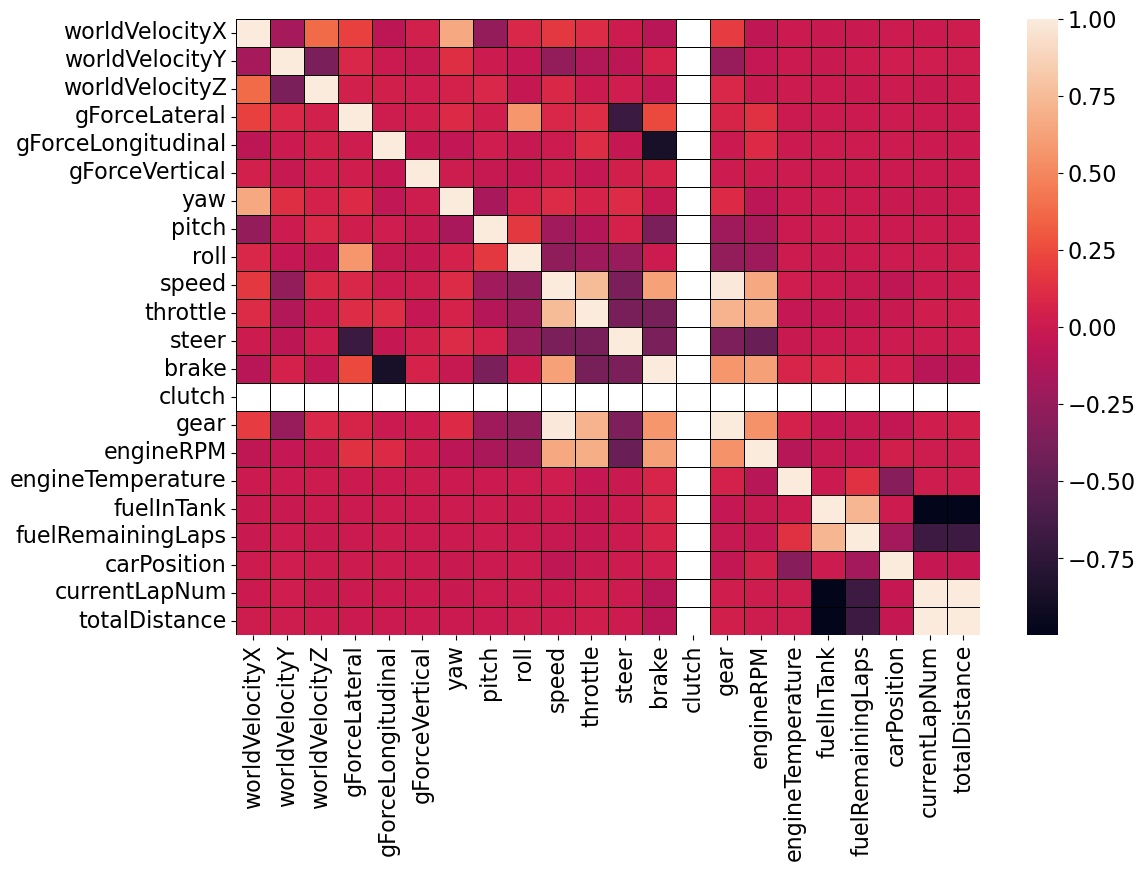

In [21]:
## Now for the heatmap
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(tm145_1.corr(numeric_only=True),linewidth=.5,linecolor='black')

st.pyplot(fig)

In [7]:
# Strong negative corr between brake and gforcelong, steer and  gforcelat, currentLapNum and fuelinTank
# Strong positive corr between gear and speed

In [8]:
tm145

,sessionTime,frameIdentifier,pilot_index,worldPositionX,worldPositionY,worldPositionZ,worldVelocityX,worldVelocityY,worldVelocityZ,worldForwardDirX,...,ersDeployedThisLap,carPosition,currentLapTime,currentLapNum,lapDistance,totalDistance,pitStatus,sector,driverStatus,resultStatus
0,0.01045,NaN,NaN,338.27011,87.64803,982.12366,0.00148,0.00128,-0.00079,6810.0,...,NaN,18,NaN,1,-153.76416,-153.76416,NaN,2.0,on track,active
1,0.01045,NaN,1.0,368.84494,87.64617,1097.98560,0.00164,0.00143,0.00049,6816.0,...,NaN,3,NaN,1,-34.06787,-34.06787,NaN,2.0,on track,active
2,0.01045,NaN,2.0,365.50424,87.63545,1082.33362,-0.00027,-0.00252,0.00010,6810.0,...,NaN,5,NaN,1,-50.07227,-50.07227,NaN,2.0,on track,active
3,0.01045,NaN,3.0,348.30042,87.63963,1029.06458,-0.00207,0.00295,-0.00003,6803.0,...,NaN,12,NaN,1,-105.77002,-105.77002,NaN,2.0,on track,active
4,0.01045,NaN,4.0,358.24823,87.64635,1075.70874,0.00224,-0.00194,0.00072,6818.0,...,NaN,6,NaN,1,-58.08643,-58.08643,NaN,2.0,on track,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046815,2757.86548,58271.0,15.0,-42.72875,88.79483,875.45013,-7.24263,0.75570,-36.37080,-6498.0,...,1.301697e+06,11,23.06129,35,1230.39062,149859.57812,NaN,1.0,on track,active
1046816,2757.86548,58271.0,16.0,427.77100,87.67443,1438.59851,1.12654,0.03713,18.98629,3059.0,...,5.391362e+04,12,6.80934,35,343.15625,148972.34375,NaN,NaN,on track,active
1046817,2757.86548,58271.0,17.0,371.60034,87.63984,1319.71448,-7.61521,0.03265,54.83246,-4513.0,...,2.691799e+04,14,0.01011,35,189.57812,148818.76562,NaN,NaN,on track,finished
1046818,2757.86548,58271.0,18.0,-112.58393,89.90612,834.86865,-37.69330,0.11621,-8.62519,-31952.0,...,1.316058e+06,9,26.49298,35,1327.79688,149956.98438,NaN,1.0,on track,active


In [9]:
#Lets see how these corrs look with our single driver
pilot_filter = tm145.pilot_index == 10
tm_145_pilot1 = tm145[pilot_filter]
tm_145_pilot1

,sessionTime,frameIdentifier,pilot_index,worldPositionX,worldPositionY,worldPositionZ,worldVelocityX,worldVelocityY,worldVelocityZ,worldForwardDirX,...,ersDeployedThisLap,carPosition,currentLapTime,currentLapNum,lapDistance,totalDistance,pitStatus,sector,driverStatus,resultStatus
10,0.01045,NaN,10.0,372.18503,87.63564,1113.62769,0.00226,-0.00218,0.00072,6817.0,...,NaN,1,NaN,1,-18.08496,-18.08496,NaN,2.0,on track,active
30,0.02127,1.0,10.0,372.18503,87.63564,1113.62769,0.00175,-0.00014,0.00057,6817.0,...,NaN,1,NaN,1,-18.08496,-18.08496,NaN,2.0,on track,active
50,0.08427,2.0,10.0,372.18503,87.63564,1113.62769,0.00174,-0.00012,0.00054,6818.0,...,NaN,1,NaN,1,-18.08496,-18.08496,NaN,2.0,on track,active
70,0.12629,3.0,10.0,372.18503,87.63564,1113.62769,0.00173,-0.00010,0.00055,6819.0,...,NaN,1,NaN,1,-18.08496,-18.08496,NaN,2.0,on track,active
90,0.17861,4.0,10.0,372.18503,87.63564,1113.62769,0.00228,-0.00213,0.00072,6819.0,...,NaN,1,NaN,1,-18.08496,-18.08496,NaN,2.0,on track,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046730,2757.65698,58267.0,10.0,-183.96194,90.08389,410.08896,9.69604,-0.00020,-78.42360,4129.0,...,1936895.250,7,33.44726,35,1787.06250,150416.25000,NaN,1.0,on track,active
1046750,2757.70703,58268.0,10.0,-183.46979,90.08381,406.18628,10.08084,-0.00026,-78.46291,4287.0,...,1938459.500,7,33.49703,35,1790.98438,150420.17188,NaN,1.0,on track,active
1046770,2757.76587,58269.0,10.0,-182.86208,90.08372,401.55984,10.52701,-0.00021,-78.50688,4468.0,...,1940311.000,7,33.55608,35,1795.65625,150424.84375,NaN,1.0,on track,active
1046790,2757.81543,58270.0,10.0,-182.33257,90.08367,397.67838,10.88867,0.00003,-78.54243,4609.0,...,1941862.125,7,33.60538,35,1799.56250,150428.75000,NaN,1.0,on track,active


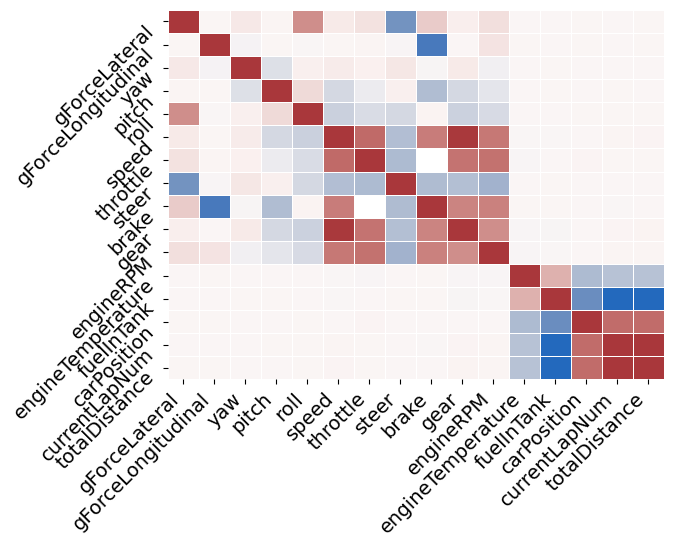

In [10]:
## I'm using the code below to cycle between pilots to compare heatmaps

'''fig, (ax1, ax2) = plt.subplots(1,2)
ax1 = sns.heatmap(tm_145_pilot1[['worldVelocityX', 'worldVelocityY',
       'worldVelocityZ', 'gForceLateral', 'gForceLongitudinal',
       'gForceVertical', 'yaw', 'pitch', 'roll', 'speed', 'throttle', 'steer',
       'brake', 'gear', 'engineRPM', 'brakesTemperature',
       'tyresSurfaceTemperature', 'tyresInnerTemperature', 'engineTemperature',
       'tyresPressure', 'surfaceType', 'fuelInTank', 'fuelRemainingLaps', 'tyresWear',
       'carPosition', 'currentLapNum', 'totalDistance']].corr(numeric_only=True),linewidth=.5,linecolor='black')
ax2 = sns.heatmap(tm145_1.corr(numeric_only=True),linewidth=.5,linecolor='black')'''

#mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

#plt.rcParams["figure.figsize"] = [10, 10]
#plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 14})
df = tm_145_pilot1[['gForceLateral', 'gForceLongitudinal',
       'yaw', 'pitch', 'roll', 'speed', 'throttle', 'steer',
       'brake', 'gear', 'engineRPM', 'brakesTemperature',
       'tyresSurfaceTemperature', 'tyresInnerTemperature', 'engineTemperature',
       'tyresPressure', 'surfaceType', 'fuelInTank', 'tyresWear',
       'carPosition', 'currentLapNum', 'totalDistance']].corr(numeric_only=True)
fig, ax = plt.subplots()
#fig.subplots_adjust(wspace=0.01)


sns.heatmap(df, cmap="vlag", ax=ax, cbar=False, linewidths=.5)#.set_xticklabels(sns.heatmap(df, cmap="vlag", ax=ax, cbar=False, linewidths=.5).get_xticklabels(), rotation=45, ha='right')
#sns.heatmap(tm145_1.corr(numeric_only=True), cmap="plasma", ax=ax2, cbar=False, linewidths=.5)
plt.xticks(rotation=45, ha ='right')
plt.yticks(rotation=45, va ='top')

plt.show()



In [11]:
# I want the average numbers per lap

tm145.columns

Index(['sessionTime', 'frameIdentifier', 'pilot_index', 'worldPositionX',
       'worldPositionY', 'worldPositionZ', 'worldVelocityX', 'worldVelocityY',
       'worldVelocityZ', 'worldForwardDirX', 'worldForwardDirY',
       'worldForwardDirZ', 'worldRightDirX', 'worldRightDirY',
       'worldRightDirZ', 'gForceLateral', 'gForceLongitudinal',
       'gForceVertical', 'yaw', 'pitch', 'roll', 'speed', 'throttle', 'steer',
       'brake', 'clutch', 'gear', 'engineRPM', 'drs', 'brakesTemperature',
       'tyresSurfaceTemperature', 'tyresInnerTemperature', 'engineTemperature',
       'tyresPressure', 'surfaceType', 'fuelMix', 'pitLimiterStatus',
       'fuelInTank', 'fuelRemainingLaps', 'tyresWear', 'actualTyreCompound',
       'tyresDamage', 'ersStoreEnergy', 'ersDeployMode',
       'ersHarvestedThisLapMGUK', 'ersHarvestedThisLapMGUH',
       'ersDeployedThisLap', 'carPosition', 'currentLapTime', 'currentLapNum',
       'lapDistance', 'totalDistance', 'pitStatus', 'sector', 'driverStatus',

In [23]:

plotdf = tm145[['currentLapNum','engineTemperature','fuelInTank','speed','gear','engineRPM']]
plotdf = plotdf.groupby(['currentLapNum']).mean()

plotdf

,engineTemperature,fuelInTank,speed,gear,engineRPM
currentLapNum,,,,,
1,90.686758,56.058273,187.958468,4.245020,10326.401032
2,90.971812,54.409178,204.236296,5.006237,10502.765844
3,90.368418,52.766029,207.267741,5.093020,10528.498224
4,90.649835,51.140117,202.563692,4.950747,10480.617785
5,90.805193,49.411751,203.693750,4.978127,10499.942286
6,90.650337,47.709496,202.930178,4.957747,10489.514942
7,90.313574,46.016198,201.082878,4.899236,10453.680904
8,90.024359,44.317882,202.236354,4.944145,10481.566130
9,89.944561,42.585922,190.326049,4.520212,10255.507332


Text(0, 0.5, 'Remaining Fuel (liters)')

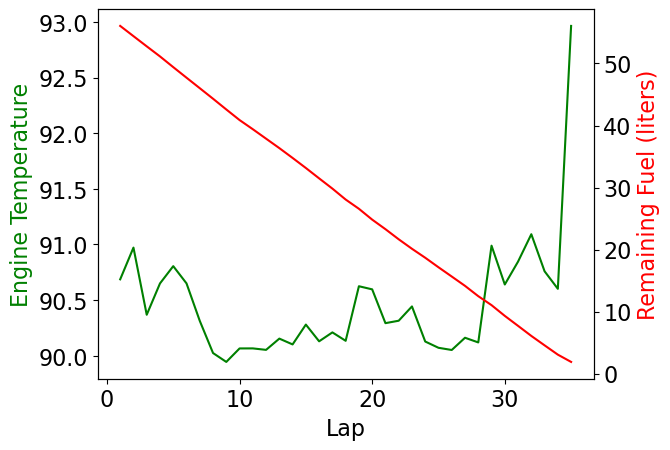

In [13]:
## Fuel in tank vs engine temp line graph
plt.rcParams.update({'font.size': 16})
fig,ax = plt.subplots()
ax.plot(plotdf.index, plotdf.engineTemperature, color = 'green', label = 'Temperature')
ax.set_xlabel('Lap')
ax.set_ylabel('Engine Temperature', color='green')
ax1 = ax.twinx()
ax1.plot(plotdf.index, plotdf.fuelInTank, color = 'red', label = "Remaining Fuel (liters)")
ax1.set_ylabel('Remaining Fuel (liters)', color='red')

In [36]:

tm145[['TempBrake1', 'TempBrake2',  'TempBrake3', 'TempBrake4']] = tm145['brakesTemperature'].str.split('/', expand=True)

tm145[['TempBrake1', 'TempBrake2',  'TempBrake3', 'TempBrake4']] = tm145[['TempBrake1', 'TempBrake2',  'TempBrake3', 'TempBrake4']].astype(float)

In [37]:
tm145.TempBrake1

0           28.0
1           28.0
2           28.0
3           28.0
4           28.0
           ...  
1046815    987.0
1046816    914.0
1046817    836.0
1046818    909.0
1046819    624.0
Name: TempBrake1, Length: 1046761, dtype: float64

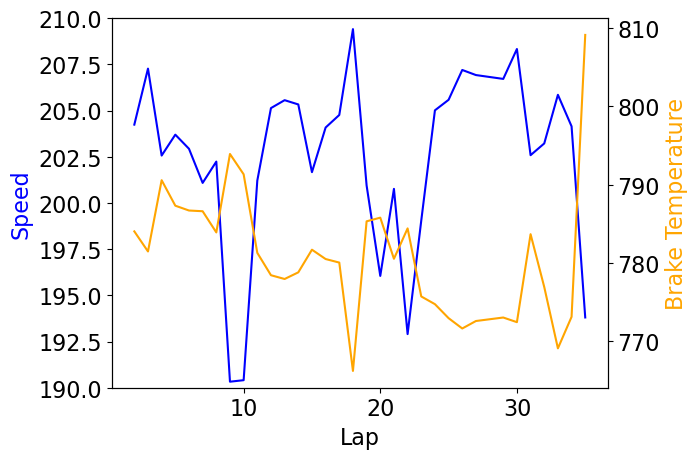

In [53]:
# Speed vs Brake line  graph


plotdf2 = tm145[['currentLapNum','speed','TempBrake1','TempBrake2','TempBrake3','TempBrake4']]
plotdf2 = plotdf2.groupby(['currentLapNum']).mean()

speed_filter = plotdf2['speed'] > 190

plotdf2 = plotdf2[speed_filter]

fig,ax = plt.subplots()
ax.plot(plotdf2.index, plotdf2['speed'], color = 'blue', label = 'speed')
ax.set_xlabel('Lap')
ax.set_ylabel('Speed', color='Blue')
ax.set_ylim([190, 210])
ax1 = ax.twinx()
ax1.plot(plotdf2.index, plotdf2['TempBrake1'], color = 'orange', label = "Brake Temperature")
ax1.set_ylabel("Brake Temperature", color='orange')
plt.show()


In [47]:
plotdf2.index

Index([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35],
      dtype='int64', name='currentLapNum')

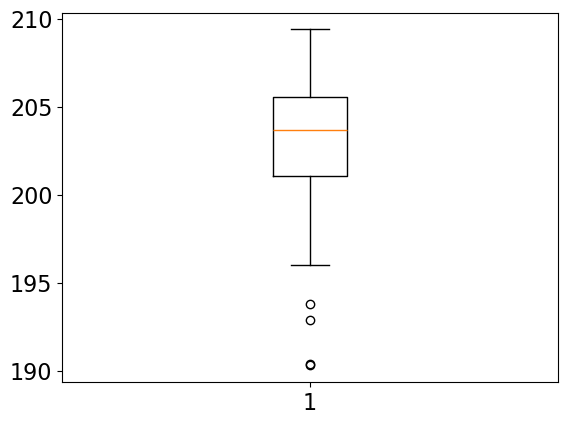

In [51]:
## IDing speed outliers to clean up brake temp vs speed

fig, ax = plt.subplots()
ax.boxplot(plotdf2['speed'])
plt.show()

In [40]:
## Groupby pilot IDs using mean of numeric values to identify pilots that have outlying tm readings

pilot_avgs = tm145[['pilot_index','gForceLateral', 'gForceLongitudinal',
       'yaw', 'pitch', 'roll', 'speed', 'throttle', 'steer',
       'brake', 'gear', 'engineRPM', 'brakesTemperature',
       'tyresSurfaceTemperature', 'tyresInnerTemperature', 'engineTemperature',
       'tyresPressure', 'surfaceType', 'fuelInTank', 'tyresWear',
       'carPosition', 'currentLapNum', 'totalDistance']].groupby(['pilot_index']).mean(numeric_only=True)
pilot_avgs

,gForceLateral,gForceLongitudinal,yaw,pitch,roll,speed,throttle,steer,brake,gear,engineRPM,engineTemperature,fuelInTank,carPosition,currentLapNum,totalDistance
pilot_index,,,,,,,,,,,,,,,,
1.0,-0.283445,0.009011,-0.100488,0.001705,0.000722,203.647451,0.865150,0.056597,0.623433,4.954791,10484.934616,89.046411,28.337134,3.192144,17.830458,75604.817799
2.0,-0.280569,0.003314,-0.093769,0.001714,0.000774,203.838990,0.871767,0.056348,0.620390,4.966141,10482.108547,89.046411,28.607268,4.460557,17.805735,75495.144900
3.0,-0.274822,0.007669,-0.101991,0.001713,0.000724,201.983063,0.862292,0.055889,0.607089,4.897564,10492.838298,89.046411,29.168810,10.561797,17.595174,74596.275601
4.0,-0.278411,0.003204,-0.099311,0.001706,0.000730,203.631085,0.855016,0.055222,0.697578,4.937384,10501.018457,89.046411,28.356873,6.256090,17.698114,75047.029595
5.0,-0.277843,0.006356,-0.105970,0.001702,0.000709,203.580863,0.864180,0.054944,0.667165,4.945983,10491.753005,89.046411,27.965719,7.253644,17.674404,74947.726138
6.0,-0.275725,0.004916,-0.403321,0.001141,0.001543,165.015904,0.855581,0.054335,0.678805,4.777866,10461.387729,89.088179,30.674721,11.442922,16.935882,72094.103841
7.0,-0.274217,0.008951,-0.108184,0.001710,0.000740,202.954641,0.866338,0.054210,0.612475,4.929856,10493.327684,89.046411,30.262171,8.052406,17.658241,74874.401178
8.0,-0.270076,0.003475,-0.099836,0.001706,0.000680,200.850997,0.843098,0.054719,0.651766,4.858871,10484.250320,89.046411,28.949500,18.786019,17.363195,73585.698036
9.0,-0.261266,0.007443,-0.093107,0.001619,0.000642,201.059947,0.862028,0.054654,0.602636,4.880501,10489.178153,89.046411,28.626163,13.096788,17.458360,74008.369079


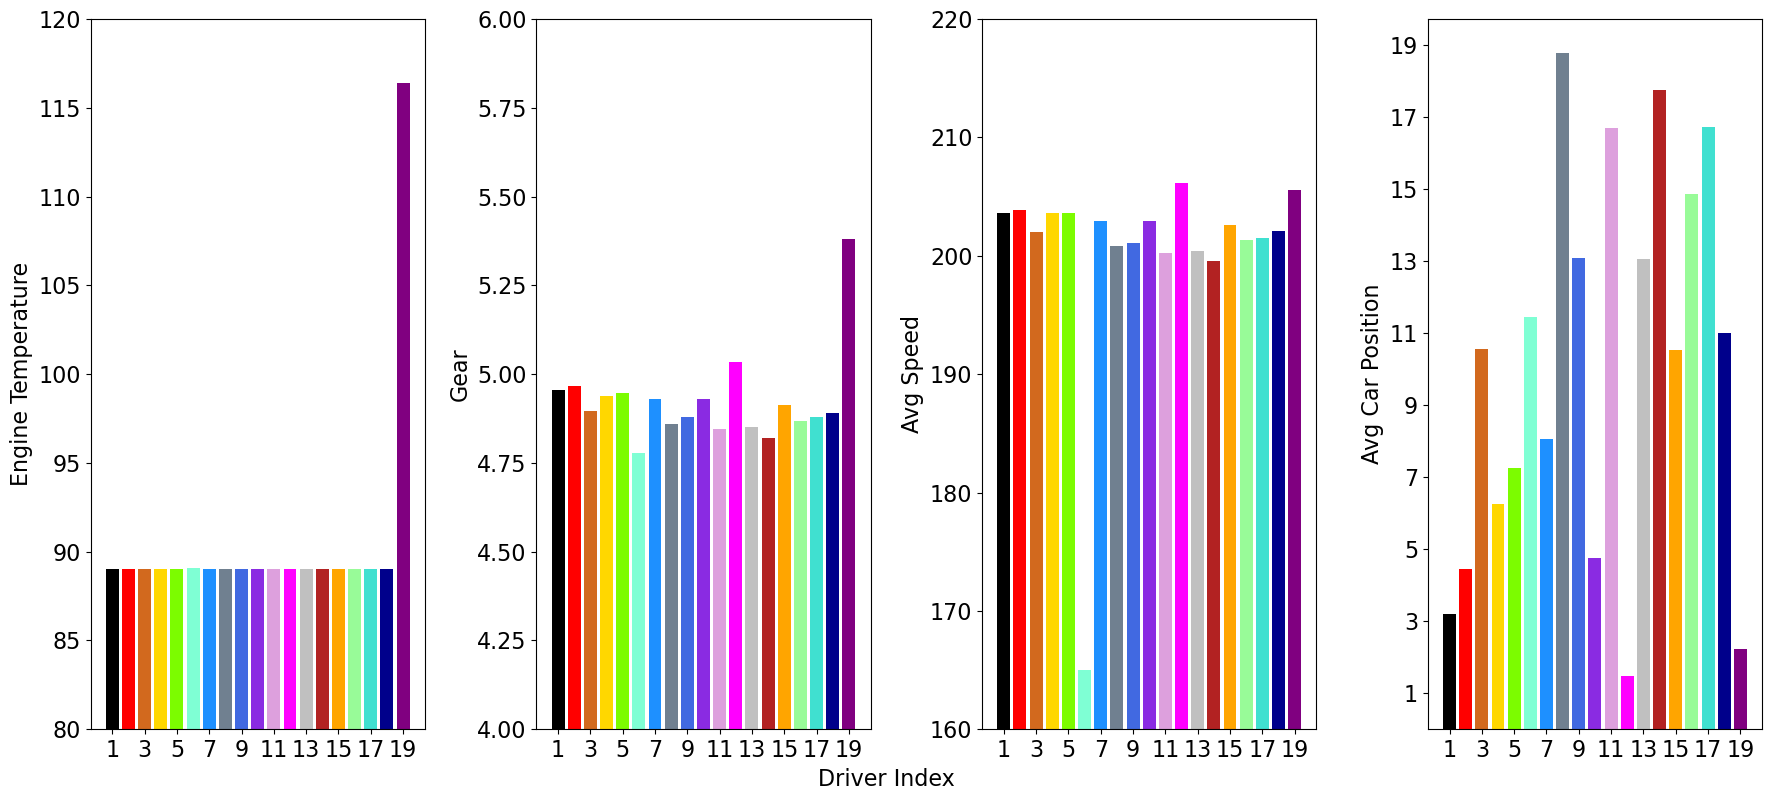

In [52]:
# This is comparing driver's mean measurement vs other driver's mean(temp, gear, speed, position)
my_cmap = ['black', 'red', 'chocolate', 'gold', 'lawngreen', 'aquamarine', 'dodgerblue', 'slategray', 'royalblue', 'blueviolet', 'plum', 'fuchsia', 'silver','firebrick','orange', 'palegreen', 'turquoise', 'darkblue','purple']

fig, axs = plt.subplots(1,4,sharex=True, tight_layout=True,figsize=(18,8))
fig.text(.5, 0.0, 'Driver Index', ha='center')
#plt.xlabel('Pilot Index')
#plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
axs[0].set_ylim([80,120])

#axs[0].set_xticklabels([0,1,2,3,5,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
axs[0].bar(pilot_avgs.index,pilot_avgs.engineTemperature, color = my_cmap)
axs[0].xaxis.set_ticks([1,3,5,7,9,11,13,15,17,19])
axs[0].set_ylabel("Engine Temperature")
axs[1].set_ylim([4,6])
axs[1].bar(pilot_avgs.index, pilot_avgs.gear,color = my_cmap)
axs[1].xaxis.set_ticks([1,3,5,7,9,11,13,15,17,19])
axs[1].set_ylabel("Gear")
axs[2].bar(pilot_avgs.index, pilot_avgs.speed,color = my_cmap)
axs[2].set_ylim([160,220])
axs[2].xaxis.set_ticks([1,3,5,7,9,11,13,15,17,19])
axs[2].set_ylabel("Avg Speed")
axs[3].bar(pilot_avgs.index, pilot_avgs.carPosition, color = my_cmap)
axs[3].xaxis.set_ticks([1,3,5,7,9,11,13,15,17,19])
axs[3].yaxis.set_ticks([1,3,5,7,9,11,13,15,17,19])
axs[3].set_ylabel("Avg Car Position")
plt.show()


In [ ]:
# Average of tm readings per lap. Cycling through min, max,and mean with this same code.Just change the .mean after the .groubyto  .min() or .max()
lap_avgs = tm145[['gForceLateral', 'gForceLongitudinal',
       'yaw', 'pitch', 'roll', 'speed', 'throttle', 'steer',
       'brake', 'gear', 'engineRPM', 'brakesTemperature',
       'tyresSurfaceTemperature', 'tyresInnerTemperature', 'engineTemperature',
       'tyresPressure', 'surfaceType', 'fuelInTank', 'tyresWear',
       'carPosition', 'currentLapNum', 'totalDistance']].groupby(['currentLapNum']).max(numeric_only=True)
lap_avgs

,gForceLateral,gForceLongitudinal,yaw,pitch,roll,speed,throttle,steer,brake,gear,engineRPM,engineTemperature,fuelInTank,carPosition,totalDistance
currentLapNum,,,,,,,,,,,,,,,
1,3.66493,4.30042,3.14154,0.03821,0.04642,318.0,1.0,1.00000,1.0,8.0,13031.0,120.0,58.96927,20,4371.20752
2,3.53797,1.79733,3.14155,0.03768,0.07128,319.0,1.0,0.95418,1.0,8.0,12717.0,125.0,57.15450,20,8742.84961
3,3.67813,1.90439,3.14153,0.03852,0.05846,331.0,1.0,0.95715,1.0,8.0,12737.0,124.0,55.68874,20,13114.31445
4,4.26178,1.85615,3.14155,0.04612,0.03961,334.0,1.0,1.00000,1.0,8.0,13007.0,128.0,53.79992,20,17485.49609
5,4.22218,1.80170,3.14153,0.06598,0.05211,336.0,1.0,1.00000,1.0,8.0,13221.0,130.0,52.27354,20,21856.96484
6,3.41614,1.79321,3.14152,0.03846,0.03938,330.0,1.0,0.95153,1.0,8.0,12404.0,129.0,50.50265,20,26228.58594
7,3.34931,1.88569,3.14159,0.03854,0.04186,330.0,1.0,1.00000,1.0,8.0,12587.0,122.0,48.79386,20,30600.10352
8,3.59522,1.81245,3.14156,0.03839,0.03956,330.0,1.0,0.95044,1.0,8.0,12378.0,112.0,47.16385,20,34971.54688
9,3.48519,1.82668,3.14155,0.03843,0.03907,329.0,1.0,1.00000,1.0,8.0,12399.0,114.0,45.67813,20,39343.01562


In [ ]:
## There are a couple columns in our tm dataset that are strings containing multiple values.  
## Here they are split into separate columns and converted to a numeric that can be investigated using .corr with the code below.

tm145[['Pressuretire1', 'Pressuretire2',  'Pressuretire3', 'Pressuretire4']] = tm145['tyresPressure'].str.split('/', expand=True)
tm145[['Temptire1', 'Temptire2',  'Temptire3', 'Temptire4']] = tm145['tyresInnerTemperature'].str.split('/', expand=True)
tm145[['TempBrake1', 'TempBrake2',  'TempBrake3', 'TempBrake4']] = tm145['brakesTemperature'].str.split('/', expand=True)
tm145.Pressuretire1 = pd.to_numeric(tm145.Pressuretire1)
tm145.Pressuretire2 = pd.to_numeric(tm145.Pressuretire2)
tm145.Pressuretire3 = pd.to_numeric(tm145.Pressuretire3)
tm145.Pressuretire4 = pd.to_numeric(tm145.Pressuretire4)
tm145.Temptire1 = pd.to_numeric(tm145.Temptire1)
tm145.Temptire2 = pd.to_numeric(tm145.Temptire2)
tm145.Temptire3 = pd.to_numeric(tm145.Temptire3)
tm145.Temptire4 = pd.to_numeric(tm145.Temptire4)
tm145.TempBrake1 = pd.to_numeric(tm145.TempBrake1)
tm145.TempBrake2 = pd.to_numeric(tm145.TempBrake2)
tm145.TempBrake3 = pd.to_numeric(tm145.TempBrake3)
tm145.TempBrake4 = pd.to_numeric(tm145.TempBrake4)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5]),
 [Text(0, 0.5, 'TempBrake1'),
  Text(0, 1.5, 'TempBrake2'),
  Text(0, 2.5, 'TempBrake3'),
  Text(0, 3.5, 'TempBrake4'),
  Text(0, 4.5, 'Pressuretire1'),
  Text(0, 5.5, 'Pressuretire2'),
  Text(0, 6.5, 'Pressuretire3'),
  Text(0, 7.5, 'Pressuretire4'),
  Text(0, 8.5, 'Temptire1'),
  Text(0, 9.5, 'Temptire2'),
  Text(0, 10.5, 'Temptire3'),
  Text(0, 11.5, 'Temptire4'),
  Text(0, 12.5, 'gForceLateral'),
  Text(0, 13.5, 'gForceLongitudinal'),
  Text(0, 14.5, 'yaw'),
  Text(0, 15.5, 'pitch'),
  Text(0, 16.5, 'roll'),
  Text(0, 17.5, 'speed'),
  Text(0, 18.5, 'brake'),
  Text(0, 19.5, 'gear'),
  Text(0, 20.5, 'totalDistance')])

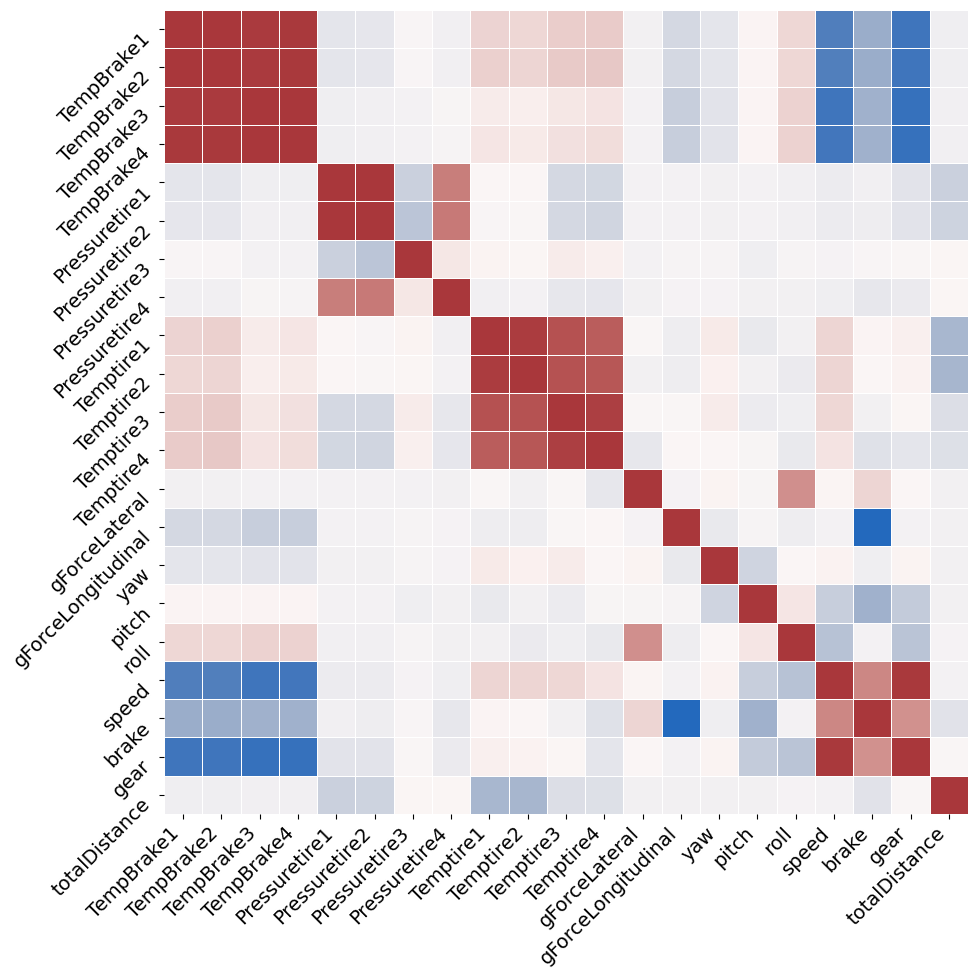

In [ ]:
## new columns heatmap with other potentially correlated columns

plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots()
sns.heatmap(tm145[['TempBrake1', 'TempBrake2',  'TempBrake3', 'TempBrake4','Pressuretire1', 'Pressuretire2',  'Pressuretire3', 'Pressuretire4','Temptire1', 'Temptire2',  
       'Temptire3', 'Temptire4','gForceLateral', 'gForceLongitudinal','yaw', 'pitch', 'roll', 'speed',
       'brake', 'gear','totalDistance']].corr(), cmap="vlag",linewidths=.5, cbar = False)

plt.xticks(rotation=45, ha ='right')
plt.yticks(rotation=45, va ='top')

In [ ]:
## The above yielded interesting results.  Reverse correlation between speed and brake temp was expected, as well as the positive correlation between speed and tire temp.
## The one outlyer in tire temp was suprising conidering this dataframe takes data from all  cars into account.  Is there a car with a huge tire disparity? Investigation is below.

tm145[['pilot_index','TempBrake1', 'TempBrake2',  'TempBrake3', 'TempBrake4','Pressuretire1', 'Pressuretire2',  'Pressuretire3', 'Pressuretire4','Temptire1', 'Temptire2',  
       'Temptire3', 'Temptire4','gForceLateral', 'gForceLongitudinal','yaw', 'pitch', 'roll', 'speed',
       'brake', 'gear','totalDistance']].groupby(['pilot_index']).mean(numeric_only=True)

,TempBrake1,TempBrake2,TempBrake3,TempBrake4,Pressuretire1,Pressuretire2,Pressuretire3,Pressuretire4,Temptire1,Temptire2,...,Temptire4,gForceLateral,gForceLongitudinal,yaw,pitch,roll,speed,brake,gear,totalDistance
pilot_index,,,,,,,,,,,,,,,,,,,,,
1.0,776.576151,776.294438,722.459923,721.894759,21.118564,21.118564,23.000000,23.000000,90.700613,89.189407,...,89.543822,-0.283445,0.009011,-0.100488,0.001705,0.000722,203.647451,0.623433,4.954791,75604.817799
2.0,769.415041,769.077058,715.634962,714.977492,21.118564,21.118564,23.000000,23.000000,89.935094,88.517263,...,89.714523,-0.280569,0.003314,-0.093769,0.001714,0.000774,203.838990,0.620390,4.966141,75495.144900
3.0,772.599882,772.280566,718.959971,718.218431,21.118564,21.118564,23.000000,23.000000,89.928158,88.425607,...,88.841871,-0.274822,0.007669,-0.101991,0.001713,0.000724,201.983063,0.607089,4.897564,74596.275601
4.0,780.229245,779.962168,725.595009,725.093605,21.118564,21.118564,23.000000,23.000000,89.906300,88.394042,...,88.730554,-0.278411,0.003204,-0.099311,0.001706,0.000730,203.631085,0.697578,4.937384,75047.029595
5.0,777.843170,777.574546,723.002083,722.432619,21.118564,21.118564,23.000000,23.000000,89.043545,87.470088,...,88.328467,-0.277843,0.006356,-0.105970,0.001702,0.000709,203.580863,0.667165,4.945983,74947.726138
6.0,683.001509,678.523817,656.725968,641.593309,21.118564,21.118564,23.000000,23.000000,83.102642,81.886409,...,82.425263,-0.275725,0.004916,-0.403321,0.001141,0.001543,165.015904,0.678805,4.777866,72094.103841
7.0,774.445249,774.156027,720.216291,719.594761,21.118564,21.118564,23.000000,23.000000,90.045417,88.573418,...,88.872308,-0.274217,0.008951,-0.108184,0.001710,0.000740,202.954641,0.612475,4.929856,74874.401178
8.0,777.409500,777.168504,723.300380,722.751113,21.118564,21.118564,23.000000,23.000000,89.103579,87.521696,...,87.348262,-0.270076,0.003475,-0.099836,0.001706,0.000680,200.850997,0.651766,4.858871,73585.698036
9.0,768.326824,768.012668,714.726503,714.035099,21.118564,21.118564,23.000000,23.000000,89.287407,87.723656,...,87.954258,-0.261266,0.007443,-0.093107,0.001619,0.000642,201.059947,0.602636,4.880501,74008.369079


In [ ]:
## Pulling in data from another race to see if the correlations are consistent

tm837[['Pressuretire1', 'Pressuretire2',  'Pressuretire3', 'Pressuretire4']] = tm837['tyresPressure'].str.split('/', expand=True)
tm837[['Temptire1', 'Temptire2',  'Temptire3', 'Temptire4']] = tm837['tyresInnerTemperature'].str.split('/', expand=True)
tm837[['TempBrake1', 'TempBrake2',  'TempBrake3', 'TempBrake4']] = tm837['brakesTemperature'].str.split('/', expand=True)
tm837.Pressuretire1 = pd.to_numeric(tm837.Pressuretire1)
tm837.Pressuretire2 = pd.to_numeric(tm837.Pressuretire2)
tm837.Pressuretire3 = pd.to_numeric(tm837.Pressuretire3)
tm837.Pressuretire4 = pd.to_numeric(tm837.Pressuretire4)
tm837.Temptire1 = pd.to_numeric(tm837.Temptire1)
tm837.Temptire2 = pd.to_numeric(tm837.Temptire2)
tm837.Temptire3 = pd.to_numeric(tm837.Temptire3)
tm837.Temptire4 = pd.to_numeric(tm837.Temptire4)
tm837.TempBrake1 = pd.to_numeric(tm837.TempBrake1)
tm837.TempBrake2 = pd.to_numeric(tm837.TempBrake2)
tm837.TempBrake3 = pd.to_numeric(tm837.TempBrake3)
tm837.TempBrake4 = pd.to_numeric(tm837.TempBrake4)

tm837[['pilot_index','TempBrake1', 'TempBrake2',  'TempBrake3', 'TempBrake4','Pressuretire1', 'Pressuretire2',  'Pressuretire3', 'Pressuretire4','Temptire1', 'Temptire2',  
       'Temptire3', 'Temptire4','gForceLateral', 'gForceLongitudinal','yaw', 'pitch', 'roll', 'speed',
       'brake', 'gear','totalDistance']].groupby(['pilot_index']).mean(numeric_only=True)

,TempBrake1,TempBrake2,TempBrake3,TempBrake4,Pressuretire1,Pressuretire2,Pressuretire3,Pressuretire4,Temptire1,Temptire2,...,Temptire4,gForceLateral,gForceLongitudinal,yaw,pitch,roll,speed,brake,gear,totalDistance
pilot_index,,,,,,,,,,,,,,,,,,,,,
0,760.212102,759.946061,705.331612,704.964864,21.1000,21.100000,23.000000,23.000000,88.602776,87.691852,...,88.608683,-0.285284,0.014073,-0.268397,0.015163,0.016594,216.174455,0.090768,5.381213,74554.881020
1,739.581261,739.187794,683.753164,683.190004,21.1000,21.100000,23.000000,23.000000,90.812548,89.767387,...,91.042308,-0.308443,0.018929,-0.249713,0.015198,0.016696,219.829784,0.085958,5.463659,76189.598796
2,756.498011,756.213468,701.006850,700.619169,21.1000,21.100000,23.000000,23.000000,89.631263,88.665193,...,89.320724,-0.286744,0.018288,-0.264177,0.015161,0.016666,216.524147,0.090210,5.395858,74743.613813
3,754.858411,754.482141,699.914119,699.352063,21.1000,21.100000,23.000000,23.000000,90.154928,89.103580,...,90.261843,-0.306810,0.006670,-0.270619,0.015163,0.016716,218.019225,0.091663,5.448552,75695.703924
4,763.525292,763.280887,708.517337,708.176725,21.1000,21.100000,23.000000,23.000000,88.535076,87.595725,...,88.345494,-0.281469,0.014945,-0.257581,0.015110,0.016337,214.818374,0.092499,5.338222,73941.007931
5,761.165897,760.919181,706.209550,705.868175,21.1000,21.100000,23.000000,23.000000,88.889911,87.939913,...,88.974447,-0.284648,0.014238,-0.270897,0.015229,0.016518,216.044156,0.091507,5.383041,74540.777347
6,750.318273,749.955000,694.330226,693.764635,21.1000,21.100000,23.000000,23.000000,90.838021,89.816425,...,91.007031,-0.301983,0.010508,-0.254694,0.015236,0.016722,219.655048,0.090779,5.485596,76022.316712
7,746.378259,746.041243,691.094962,690.510607,21.1000,21.100000,23.000000,23.000000,90.056792,89.061814,...,90.577665,-0.309727,0.008087,-0.272556,0.015095,0.016820,218.453293,0.089095,5.439130,75428.451336
8,754.069549,753.762506,698.536763,698.066435,21.1000,21.100000,23.000000,23.000000,89.548977,88.552573,...,89.815501,-0.288512,0.017652,-0.264114,0.015185,0.016554,217.015529,0.089162,5.400257,74800.912234


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5]),
 [Text(0, 0.5, 'TempBrake1'),
  Text(0, 1.5, 'TempBrake2'),
  Text(0, 2.5, 'TempBrake3'),
  Text(0, 3.5, 'TempBrake4'),
  Text(0, 4.5, 'Pressuretire1'),
  Text(0, 5.5, 'Pressuretire2'),
  Text(0, 6.5, 'Pressuretire3'),
  Text(0, 7.5, 'Pressuretire4'),
  Text(0, 8.5, 'Temptire1'),
  Text(0, 9.5, 'Temptire2'),
  Text(0, 10.5, 'Temptire3'),
  Text(0, 11.5, 'Temptire4'),
  Text(0, 12.5, 'gForceLateral'),
  Text(0, 13.5, 'gForceLongitudinal'),
  Text(0, 14.5, 'yaw'),
  Text(0, 15.5, 'pitch'),
  Text(0, 16.5, 'roll'),
  Text(0, 17.5, 'speed'),
  Text(0, 18.5, 'brake'),
  Text(0, 19.5, 'gear'),
  Text(0, 20.5, 'totalDistance')])

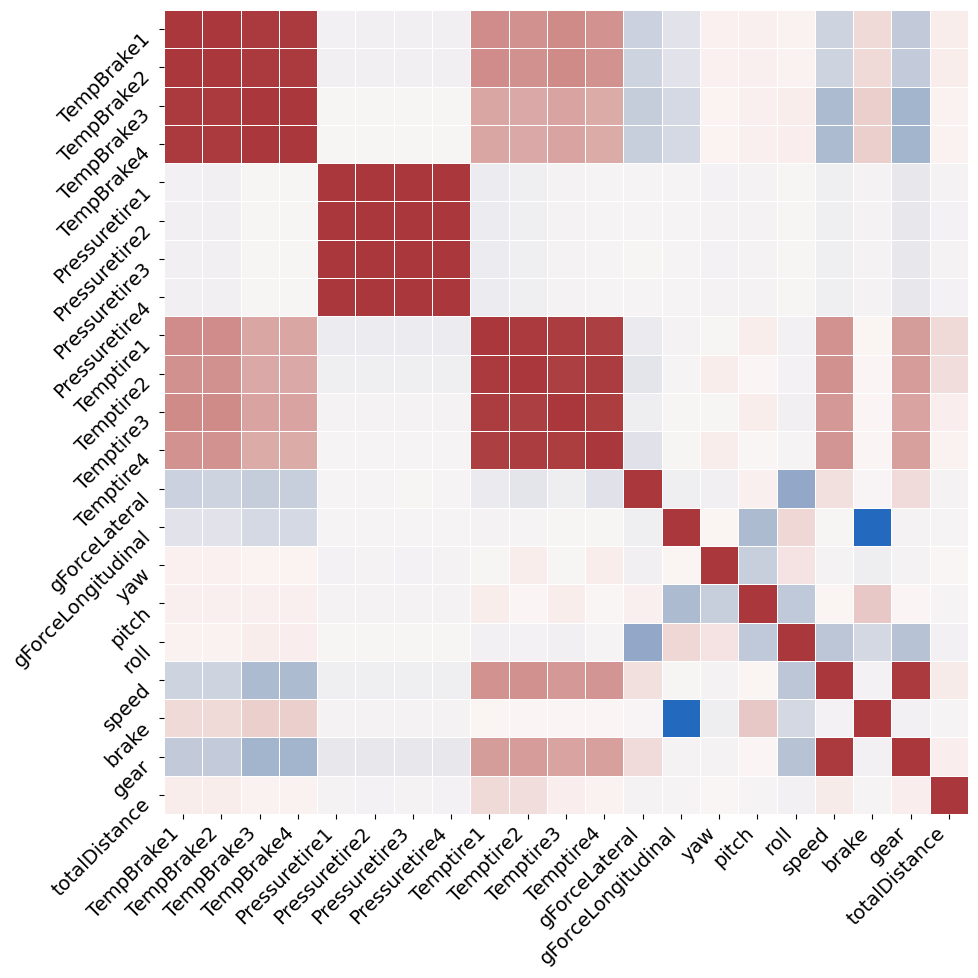

In [ ]:
fig, ax = plt.subplots()
sns.heatmap(tm837[['TempBrake1', 'TempBrake2',  'TempBrake3', 'TempBrake4','Pressuretire1', 'Pressuretire2',  'Pressuretire3', 'Pressuretire4','Temptire1', 'Temptire2',  
       'Temptire3', 'Temptire4','gForceLateral', 'gForceLongitudinal','yaw', 'pitch', 'roll', 'speed',
       'brake', 'gear','totalDistance']].corr(), cmap="vlag",linewidths=.5, cbar=False)
plt.xticks(rotation=45, ha ='right')
plt.yticks(rotation=45, va ='top')

In [ ]:
### The inconsistency does not exist in the second race dataset.  Lets look at the track data for each one

print(sd145)
print(sd837)

   weather  trackTemperature  airTemperature  totalLaps  trackLength   trackId
0        0                29              20         35         4371  Montreal
   weather  trackTemperature  airTemperature  totalLaps  trackLength  \
0        0                30              21         36         4323   

        trackId  
0  RedBull Ring  


In [ ]:
## Without digging into the physics of the problem, Montreal has no extreme left turns, but RedBull does. Montreal also has higher speed straight aways with more extreme stops. 
## This might lead to the tire pressure irregularity in all cars on the Montreal track.

## Looking at the average of each driver's speed vs position, it's apparent the higher average speed results in lower position.
## I want to see a hist of brake usage to compare against speed average.

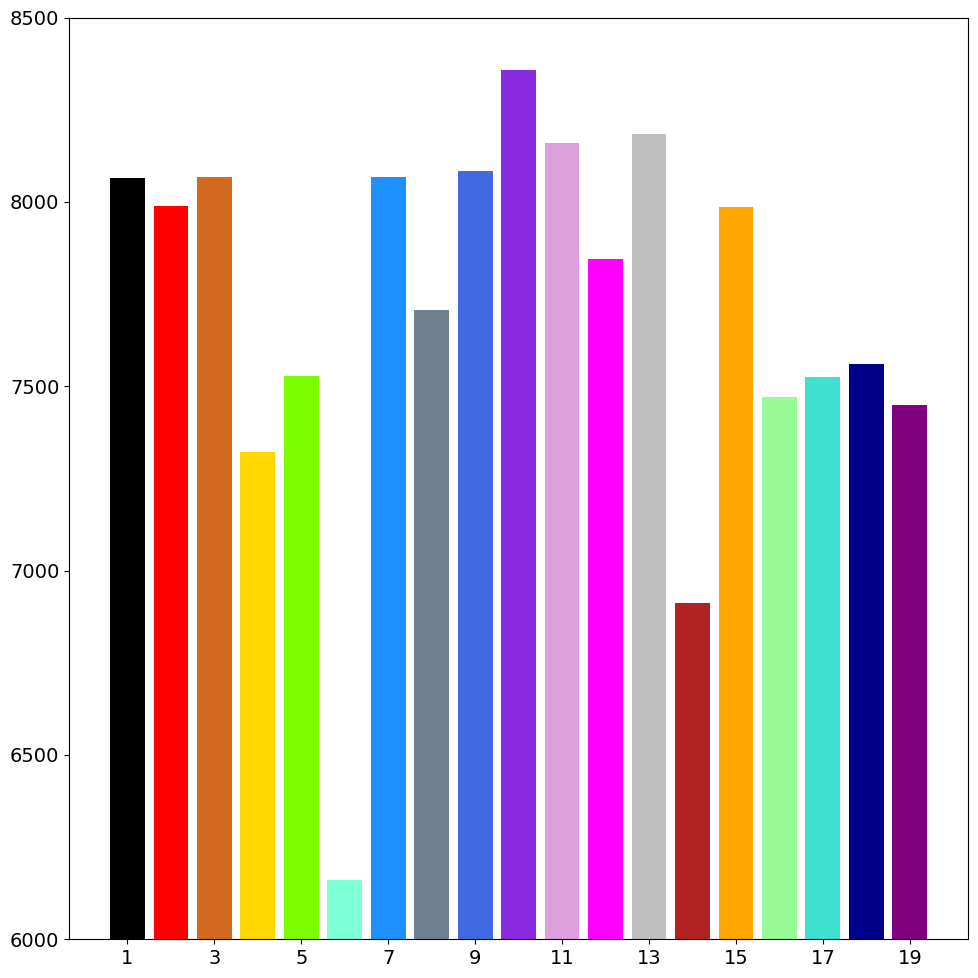

In [ ]:
brake_filter = tm145.brake > 0


brake_filtered = tm145[brake_filter]

barset = brake_filtered[['pilot_index', 'brake']].groupby(["pilot_index"]).count()

low= brake_filtered['brake'].count()
my_cmap = ['black', 'red', 'chocolate', 'gold', 'lawngreen', 'aquamarine', 'dodgerblue', 'slategray', 'royalblue', 'blueviolet', 'plum', 'fuchsia', 'silver','firebrick','orange', 'palegreen', 'turquoise', 'darkblue','purple']
#barset.index
fig, ax = plt.subplots(tight_layout=True)
plt.ylim(6000,8500)
ax.bar(barset.index,barset['brake'], color = my_cmap)
ax.xaxis.set_ticks([1,3,5,7,9,11,13,15,17,19])




Text(0, 0.5, 'Avg Speed')

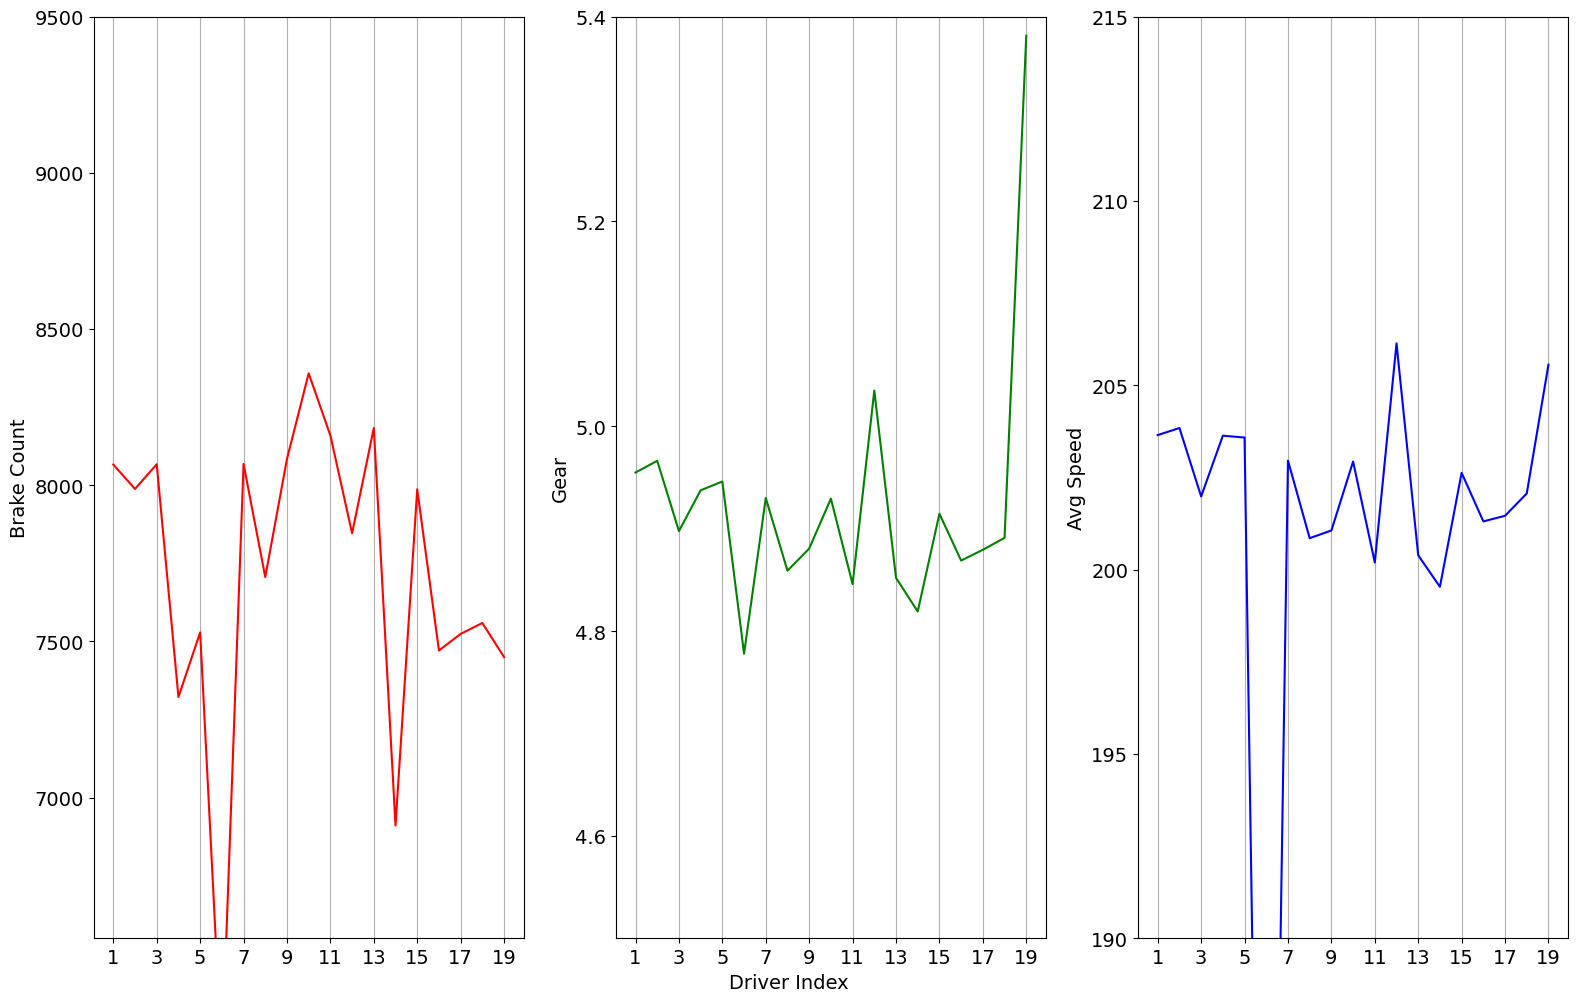

In [ ]:
## Using a line chart to compare brakes, position, speed, and gear.
fig, axs = plt.subplots(1,3, figsize = (16,10), tight_layout=True)
fig.text(.5, 0.0, 'Driver Index', ha='center')
#axs[0].set_ylim([])
axs[0].grid(axis = 'x')
axs[0].plot(barset.index,barset['brake'], color = 'red')
axs[0].xaxis.set_ticks([1,3,5,7,9,11,13,15,17,19])
axs[0].set_ylim(6550,9500)
axs[0].set_ylabel("Brake Count")
axs[1].grid(axis = 'x')
axs[1].set_ylim([4.5,5.4])
axs[1].plot(pilot_avgs.index, pilot_avgs.gear,color = 'green')
axs[1].xaxis.set_ticks([1,3,5,7,9,11,13,15,17,19])
axs[1].set_ylabel("Gear")
axs[2].grid(axis = 'x')
axs[2].plot(pilot_avgs.index, pilot_avgs.speed,color = 'blue')
axs[2].set_ylim([190,215])
axs[2].xaxis.set_ticks([1,3,5,7,9,11,13,15,17,19])
axs[2].set_ylabel("Avg Speed")




(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0, 0.5, 'gForceLateral'),
  Text(0, 1.5, 'gForceLongitudinal'),
  Text(0, 2.5, 'yaw'),
  Text(0, 3.5, 'pitch'),
  Text(0, 4.5, 'roll'),
  Text(0, 5.5, 'speed'),
  Text(0, 6.5, 'throttle'),
  Text(0, 7.5, 'steer'),
  Text(0, 8.5, 'brake'),
  Text(0, 9.5, 'gear'),
  Text(0, 10.5, 'engineRPM')])

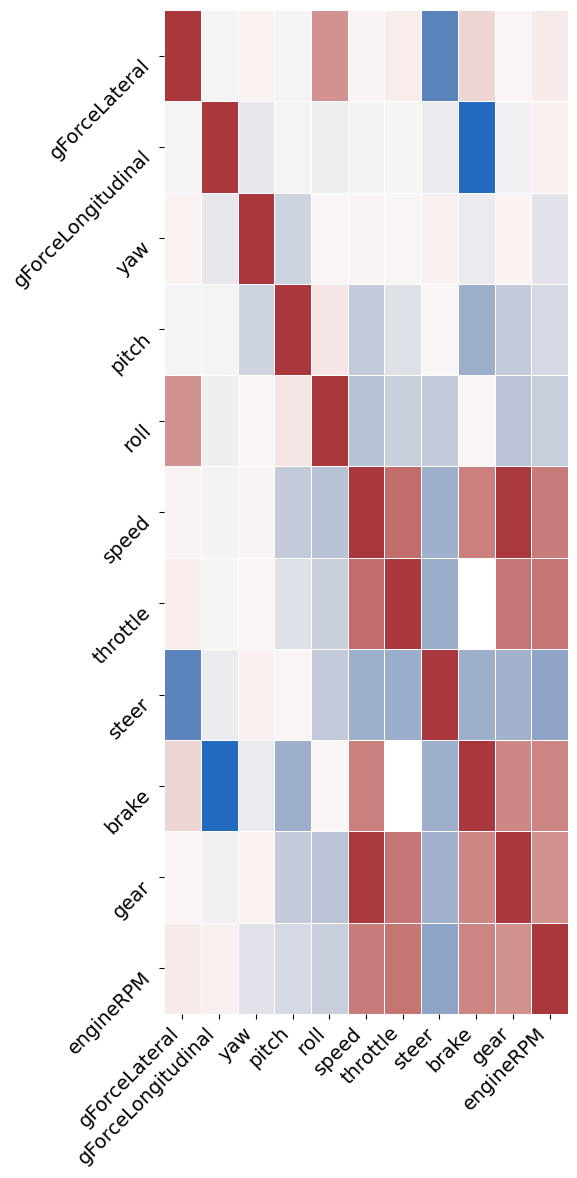

In [ ]:
plt.rcParams.update({'font.size': 14})
df = tm_145_pilot1[['gForceLateral', 'gForceLongitudinal',
       'yaw', 'pitch', 'roll', 'speed', 'throttle', 'steer',
       'brake', 'gear', 'engineRPM']].corr(numeric_only=True)
fig, ax = plt.subplots(figsize = (6,12))
#fig.subplots_adjust(wspace=0.01)


sns.heatmap(df, cmap="vlag", ax=ax, cbar=False, linewidths=.5)#.set_xticklabels(sns.heatmap(df, cmap="vlag", ax=ax, cbar=False, linewidths=.5).get_xticklabels(), rotation=45, ha='right')
#sns.heatmap(tm145_1.corr(numeric_only=True), cmap="plasma", ax=ax2, cbar=False, linewidths=.5)
plt.xticks(rotation=45, ha ='right')
plt.yticks(rotation=45, va ='top')